## 単変量統計とグリッドサーチの使用

### データの読み込み

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("./2019-summer-match-data-OraclesElixir-2019-11-10.xlsx")

In [17]:
df.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,1,Blue,...,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,2,Blue,...,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,3,Blue,...,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,4,Blue,...,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,5,Blue,...,-1156,2731,2376,355,4,3,1,6,5,1


In [18]:
print(type(df))
df.shape

<class 'pandas.core.frame.DataFrame'>


(1428, 98)

### データクレンジング

##### playeridが3桁の列を削除
playeridが三桁のものはチーム合計のため削除を行う

In [20]:
# playerIDが三桁はチーム合計のスタッツになるため除外
dropPlayer = df[ df['playerid'] >= 100 ].index
df.drop(dropPlayer, inplace=True)
df['playerid'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

### 単変量統計

In [21]:
# 単変量統計前準備: DataFrameよりdtype=objectを削除
df = df.select_dtypes(include=['int64', 'float64'])
df.head()

,gameid,date,patchno,playerid,gamelength,result,k,d,a,teamkills,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,43740.286146,9.19,1,26.533333,0,0,4,4,7,...,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,43740.286146,9.19,2,26.533333,0,1,4,5,7,...,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,43740.286146,9.19,3,26.533333,0,1,5,6,7,...,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,43740.286146,9.19,4,26.533333,0,3,4,1,7,...,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,43740.286146,9.19,5,26.533333,0,2,5,2,7,...,-1156,2731,2376,355,4,3,1,6,5,1


In [22]:
# 欠損値の抽出
print(df.loc[:, df.isnull().any()])

      heraldtime  fbaron  fbarontime
0            NaN     0.0   23.779817
1            NaN     0.0   23.779817
2            NaN     0.0   23.779817
3            NaN     0.0   23.779817
4            NaN     0.0   23.779817
...          ...     ...         ...
1421         NaN     0.0   23.078600
1422         NaN     0.0   23.078600
1423         NaN     0.0   23.078600
1424         NaN     0.0   23.078600
1425         NaN     0.0   23.078600

[1190 rows x 3 columns]


In [23]:
# hereldtimeはチーム合計のスタッツとして記録されているため除外
df_dropH = df.drop(["heraldtime"], axis=1)

# fbaron, fbarontimeが欠損値のマッチは例外として除外
df_cleaning = df_dropH.dropna(how="any")

# 欠損値の再確認
df_cleaning.isnull().any(axis=0)

gameid        False
date          False
patchno       False
playerid      False
gamelength    False
              ...  
oppcsat10     False
csdat10       False
csat15        False
oppcsat15     False
csdat15       False
Length: 74, dtype: bool

In [24]:
data = df_cleaning.drop(['result', 'gameid'], axis=1)
target = df_cleaning['result']

In [25]:
# 単変量統計
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0, test_size=.5)

# SelectPercentileを使用して特徴量を半分に
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 訓練セットを変換
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (575, 72)
X_train_selected.shape: (575, 36)


[False False False False  True  True  True  True  True False False False
 False  True  True False False False  True  True  True  True False  True
  True  True False  True  True  True False  True  True  True  True  True
 False  True  True  True  True False False False False False False False
  True  True  True  True False False False  True False False False  True
  True False  True False False  True False False False False False  True]


Text(0.5, 0, 'Sample index')

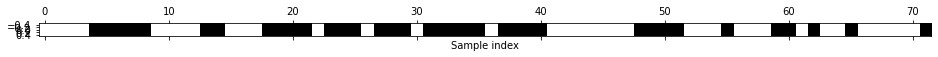

In [26]:
# 選択特徴量の可視化
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')

In [27]:
# テストデータの変換を行い、影響の確認
from sklearn.linear_model import LogisticRegression

# テストデータの変換
X_test_selected = select.transform(X_test)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.976
Score with only selected features: 0.983


##### GridSearchCV及びRandomizedSearchCV

In [13]:
import warnings
warnings.filterwarnings('ignore')

import scipy.stats
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score


# グリッドサーチ用にモデルとパラメーターセットをまとめた辞書を用意
# 辞書のkeyにはオブジェクトのインスタンスを指定することができます
model_param_set_grid = {
    LogisticRegression(): {
        "C": [10 ** i for i in range(-5, 5)],
        "random_state": [42]
    },
    LinearSVC(): {
        "C": [10 ** i for i in range(-5, 5)],
        "multi_class": ["ovr", "crammer_singer"],
        "random_state": [42],
        "max_iter": [1000]
    },
    SVC(): {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C": [10 ** i for i in range(-5, 5)],
        "decision_function_shape": ["ovr", "ovo"],
        "random_state": [42],
        "max_iter": [1000]
    },
    DecisionTreeClassifier(): {
        "max_depth": [i for i in range(1, 20)],
    },
    RandomForestClassifier(): {
        "n_estimators": [i for i in range(10, 20)],
        "max_depth": [i for i in range(1, 10)],
    },
    KNeighborsClassifier(): {
        "n_neighbors": [i for i in range(1, 10)]
    }
}

# ランダムサーチ用にモデルとパラメーターセットをまとめた辞書を用意
model_param_set_random = {
    LogisticRegression(): {
        "C": scipy.stats.uniform(0.00001, 1000),
        "random_state": scipy.stats.randint(0, 100)
    },
    LinearSVC(): {
        "C": scipy.stats.uniform(0.00001, 1000),
        "multi_class": ["ovr", "crammer_singer"],
        "random_state": scipy.stats.randint(0, 100),
        "max_iter": [1000]
    },
    SVC(): {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C": scipy.stats.uniform(0.00001, 1000),
        "decision_function_shape": ["ovr", "ovo"],
        "random_state": scipy.stats.randint(0, 100),
        "max_iter": [1000]
    },
    DecisionTreeClassifier(): {
        "max_depth": scipy.stats.randint(1, 20),
    },
    RandomForestClassifier(): {
        "n_estimators": scipy.stats.randint(10, 100),
        "max_depth": scipy.stats.randint(1, 20),
    },
    KNeighborsClassifier(): {
        "n_neighbors": scipy.stats.randint(1, 20)
    }
}

# スコア比較用に変数を用意
max_score = 0
best_model = None
best_param = None

# グリッドサーチでパラメーターサーチ
for model, param in model_param_set_grid.items():
    clf = GridSearchCV(model, param)
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    score = f1_score(y_test, y_pred, average="micro")
    # 最高評価更新時にモデルやパラメーターも更新
    if max_score < score:
        max_score = score
        best_model = model.__class__.__name__
        best_param = clf.best_params_

# ランダムサーチでパラメーターサーチ
for model, param in model_param_set_random.items():
    clf = RandomizedSearchCV(model, param)
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    score = f1_score(y_test, y_pred, average="micro")
    # 最高評価更新時にモデルやパラメーターも更新
    if max_score < score:
        max_score = score
        best_model = model.__class__.__name__
        best_param = clf.best_params_
        
print("学習モデル:{},\nパラメーター:{}".format(best_model, best_param))
# 最も成績のいいスコアを出力してください。
print("ベストスコア:",max_score)

学習モデル:DecisionTreeClassifier,
パラメーター:{'max_depth': 6}
ベストスコア: 1.0


In [14]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=8)

tree = DecisionTreeClassifier(max_depth=7, random_state=0)
tree.fit(X_train_selected, y_train)

scores = cross_val_score(tree, X_train_selected, y_train, cv=kfold)

print("cross-validation scores: {}".format(scores))

cross-validation scores: [0.95833333 0.97222222 0.97222222 0.98611111 1.         1.
 0.98611111 0.95774648]
